In [1]:
pip install tensorflow==2.0

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.0.0'

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test, x_train = x_test/255.0, x_train/255.0 # normalization

In [0]:
# add channel dimension, Tensorflow requests NHWC (or BHWC) format. Number/Batch_size, height, width, channels
# for 1D vectors, it should be Number/Batch_size, length
x_train = x_train[...,None]
x_test = x_test[..., None]


In [0]:
# another way to define models
# lets us access intermediate results too

mask_to_multiply = tf.Variable(initial_value = tf.initializers.GlorotNormal()(shape=(28,28,1)), trainable = True)
mask_to_multiply = tf.expand_dims(mask_to_multiply, 0) # add extra axis for batch size

#PHYSICAL LAYERS
input_image = tf.keras.layers.Input(shape = (28,28,1)) # Input layer, shape should be given as HWC
out = tf.math.multiply(input_image, mask_to_multiply) # hadamard product for illumination physical layer
out = tf.keras.layers.Conv2D(filters = 1, kernel_size = 5, strides =1, padding ="same", activation = "relu")(out) # convolution for physical layer
####################################################################################################################
#DIGITAL LAYERS
out = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides =2, padding ="same", activation = "relu")(out)
flat = tf.keras.layers.Flatten()(out)
dense = tf.keras.layers.Dense(units = 256, activation = "relu")(flat)
logits = tf.keras.layers.Dense(units = 10, activation = "sigmoid")(dense)

# Make a model by providing the input layer and output layer
model = tf.keras.models.Model(input_image, logits)

In [0]:
# as ususal, pick optimizer, loss and metrics
print_weights = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: plt.imshow(mask_to_multiply[0,:,:,0]))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 723us/sample - loss: 0.4877 - accuracy: 0.8530 - val_loss: 0.2413 - val_accuracy: 0.9271
Epoch 2/5
60000/60000 [==============================] - 43s 710us/sample - loss: 0.1994 - accuracy: 0.9392 - val_loss: 0.1471 - val_accuracy: 0.9555
Epoch 3/5
60000/60000 [==============================] - 46s 761us/sample - loss: 0.1270 - accuracy: 0.9614 - val_loss: 0.1180 - val_accuracy: 0.9637
Epoch 4/5
60000/60000 [==============================] - 47s 784us/sample - loss: 0.0917 - accuracy: 0.9718 - val_loss: 0.1061 - val_accuracy: 0.9675
Epoch 5/5
60000/60000 [==============================] - 46s 759us/sample - loss: 0.0714 - accuracy: 0.9776 - val_loss: 0.0841 - val_accuracy: 0.9727


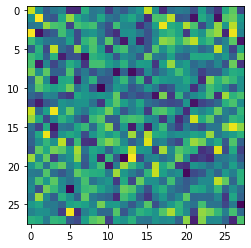

In [7]:
# store history in a variable
h = model.fit(x_train, y_train,
         epochs = 5,
         batch_size = 32,
         validation_data = (x_test,y_test),
         callbacks = [print_weights])

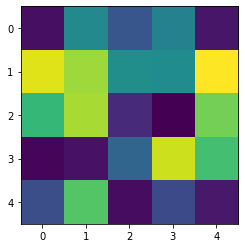

In [8]:
plt.imshow(model.layers[2].get_weights()[0][:,:,0,0]) # convolution for physical layer visualized

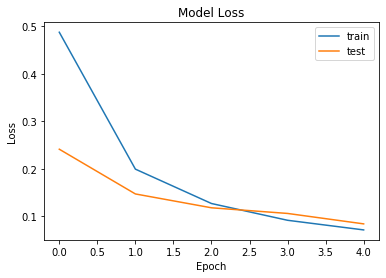

In [9]:
# plot curves
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

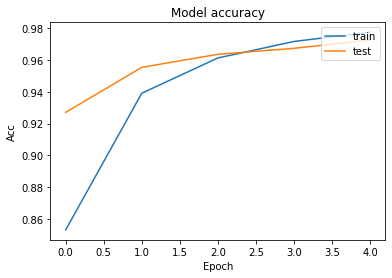

In [10]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()